## Date - 16/10/2023
## Team ID - 3869
## Project Title - Future Sales Prediction

## Importing Dependencies

In [65]:
import numpy as np
import pandas as pd
import plotly as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load Dataset

In [66]:
data = pd.read_csv('Sales.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [67]:
data.shape

(200, 4)

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [69]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


In [70]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

# Visualisation of Data

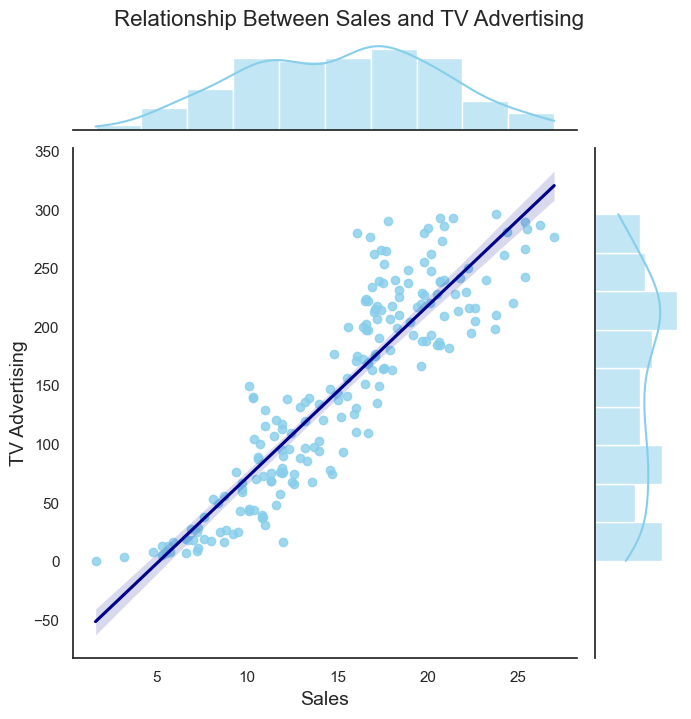

In [71]:
sns.set(style="white")
sns.jointplot(data=data, x='Sales', y='TV', kind='reg', height=7, color='skyblue', line_kws={'color':'darkblue'})
plt.xlabel('Sales', fontsize=14)
plt.ylabel('TV Advertising', fontsize=14)
plt.suptitle('Relationship Between Sales and TV Advertising', y=1.02, fontsize=16)
plt.show()


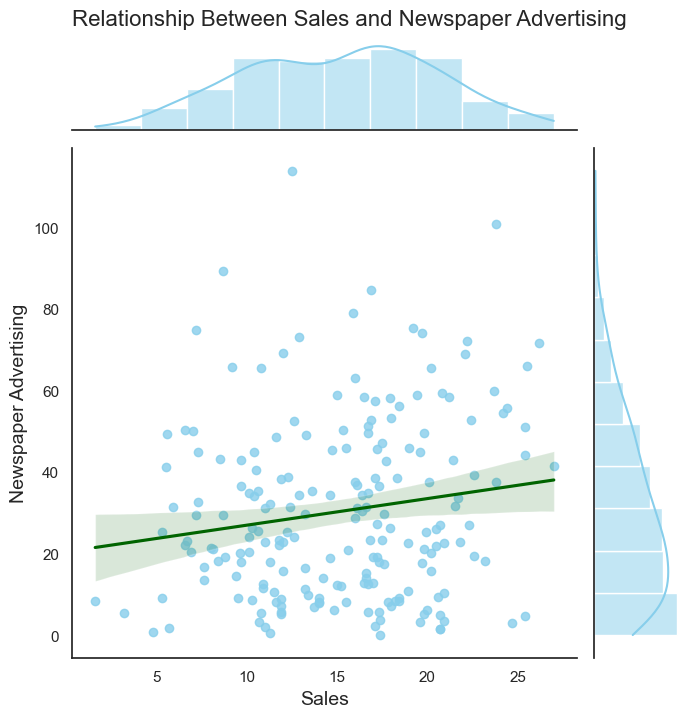

In [72]:

sns.set(style="white")
sns.jointplot(data=data, x='Sales', y='Newspaper', kind='reg', height=7, color='skyblue', line_kws={'color':'darkgreen'})
plt.xlabel('Sales', fontsize=14)
plt.ylabel('Newspaper Advertising', fontsize=14)
plt.suptitle('Relationship Between Sales and Newspaper Advertising', y=1.02, fontsize=16)
plt.show()



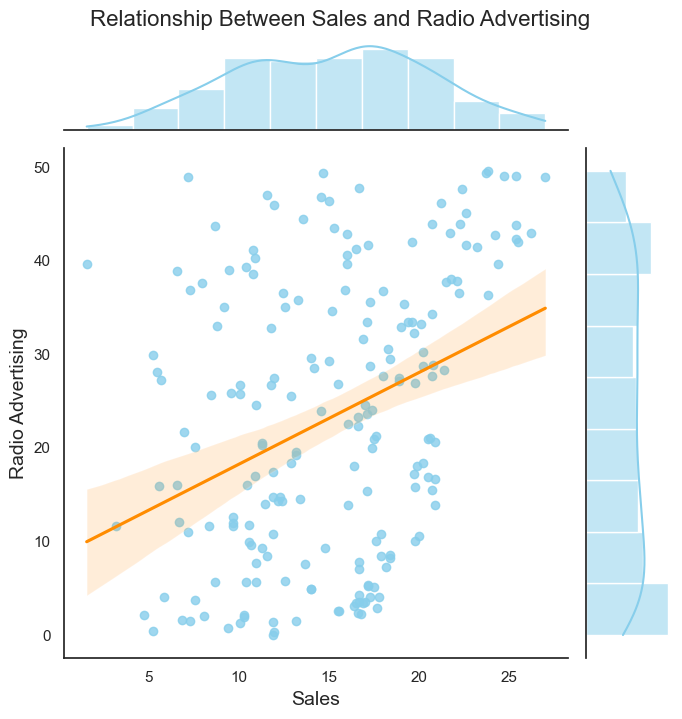

In [73]:
sns.set(style="white")
sns.jointplot(data=data, x='Sales', y='Radio', kind='reg', height=7, color='skyblue', line_kws={'color':'darkorange'})
plt.xlabel('Sales', fontsize=14)
plt.ylabel('Radio Advertising', fontsize=14)
plt.suptitle('Relationship Between Sales and Radio Advertising', y=1.02, fontsize=16)
plt.show()



In [74]:
correlation = data.corr()
sales_correlation = correlation["Sales"].sort_values(ascending=False)
styled_sales_correlation = sales_correlation.apply(lambda x: f'{x:.2f}')
styled_sales_correlation = styled_sales_correlation.reset_index()
styled_sales_correlation.columns = ["Feature", "Correlation with Sales"]
styled_sales_correlation.style.background_gradient(cmap='coolwarm', axis=0)


,Feature,Correlation with Sales
0,Sales,1.00
1,TV,0.90
2,Radio,0.35
3,Newspaper,0.16


<Figure size 1200x800 with 0 Axes>

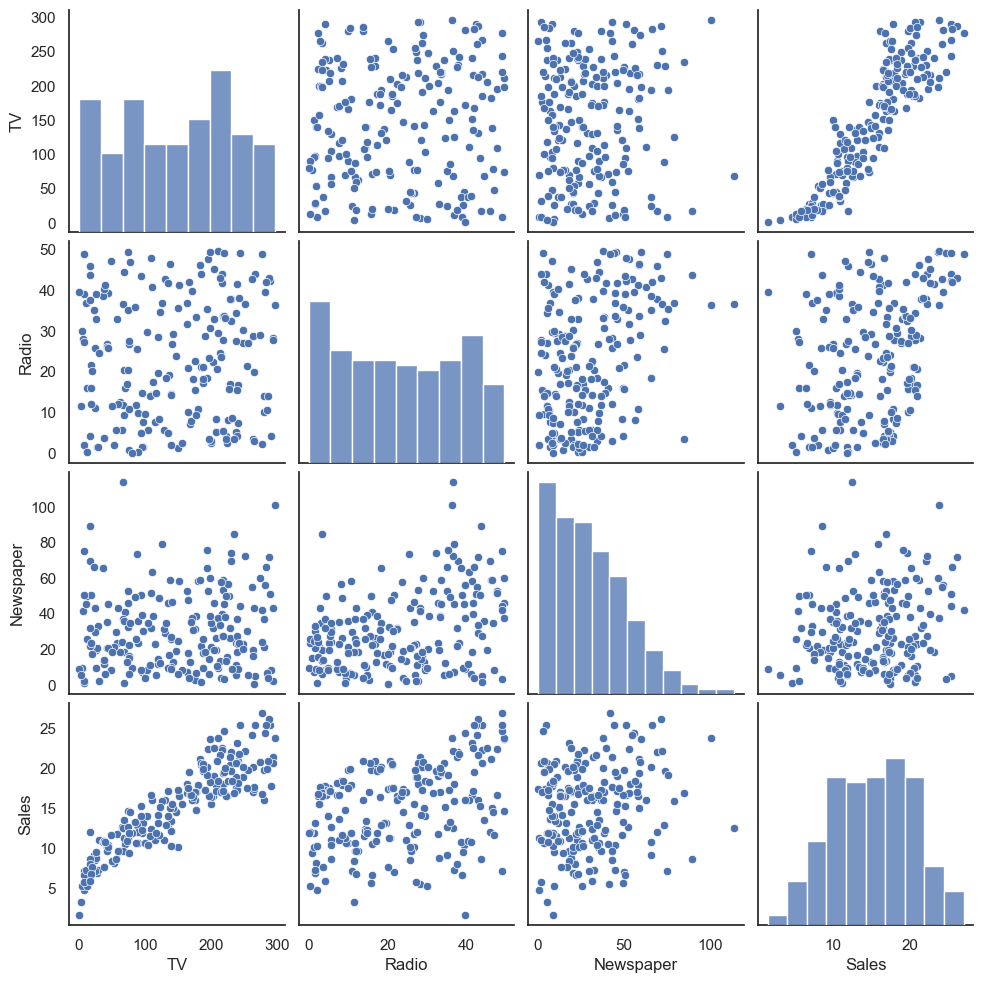

In [75]:
plt.figure(figsize=(12,8))
sns.pairplot(data)


# Data Preprocessing

array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

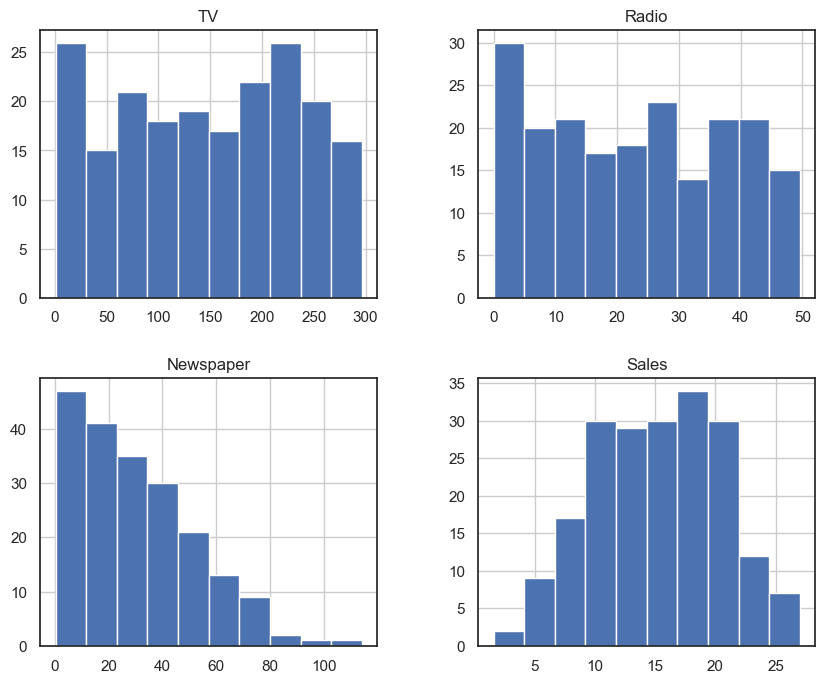

In [76]:
data.hist(figsize=(10,8))


# Data normalization



In [77]:

scaler = MinMaxScaler()
columns_to_normalize = ['TV', 'Radio', 'Newspaper']
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])
data.head()

,TV,Radio,Newspaper,Sales
0,0.775786,0.762097,0.605981,22.1
1,0.148123,0.792339,0.394019,10.4
2,0.055800,0.925403,0.606860,12.0
3,0.509976,0.832661,0.511873,16.5
4,0.609063,0.217742,0.510994,17.9


<Axes: >

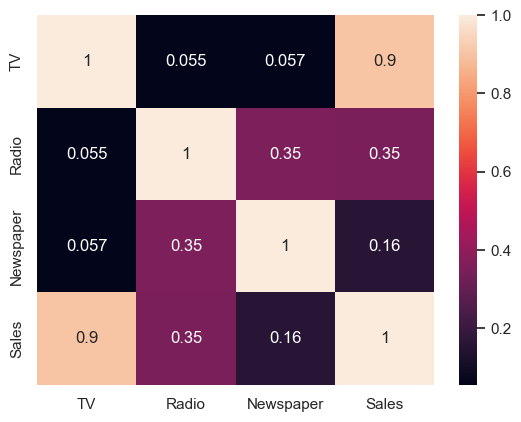

In [78]:
sns.heatmap(data.corr(),annot=True)